In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid")

In [2]:
spot_data = pd.read_excel(r'C:\Users\chris\OneDrive\Dokumente\PDFs\Uni\Wahlpflichtmodule\Analysis of Economic and Financial Time Series\Seminararbeit\Data\sp500_spot_data.xlsx')
futures_data = pd.read_excel(r'C:\Users\chris\OneDrive\Dokumente\PDFs\Uni\Wahlpflichtmodule\Analysis of Economic and Financial Time Series\Seminararbeit\Data\sp500_futures_data.xlsx')

In [3]:
print(spot_data.head())

        date    price
0 2015-01-02  2058.20
1 2015-01-05  2020.58
2 2015-01-06  2002.61
3 2015-01-07  2025.90
4 2015-01-08  2062.14


In [4]:
print(futures_data.head())

        date    price
0 2015-01-02  2046.25
1 2015-01-05  2016.00
2 2015-01-06  1994.50
3 2015-01-07  2019.50
4 2015-01-08  2055.00


In [5]:
# Count number of missing values
spot_price_nas = spot_data['price'].isna().sum()
futures_price_nas = futures_data['price'].isna().sum()
print(f"Number of missing values in spot price data: {spot_price_nas}")
print(f"Number of missing values in futures price data: {futures_price_nas}")

Number of missing values in spot price data: 0
Number of missing values in futures price data: 0


In [6]:
# Count number of values 
spot_price_count = spot_data['price'].count()
futures_price_count = futures_data['price'].count()
print(f"Number of non-missing values in spot price data: {spot_price_count}")
print(f"Number of non-missing values in futures price data: {futures_price_count}")

Number of non-missing values in spot price data: 2646
Number of non-missing values in futures price data: 2651


In [7]:
print(spot_data.tail())
print(futures_data.tail())

           date    price
2641 2025-07-07  6229.98
2642 2025-07-08  6225.52
2643 2025-07-09  6263.26
2644 2025-07-10  6280.46
2645 2025-07-11  6259.75
           date    price
2646 2025-07-07  6276.00
2647 2025-07-08  6272.00
2648 2025-07-09  6307.25
2649 2025-07-10  6324.25
2650 2025-07-11  6300.00


In [8]:
# Missing spot days
spot_dates = spot_data['date']
futures_dates = futures_data['date']
missing_spot_dates = futures_dates[~futures_dates.isin(spot_dates)]
print(f"Missing spot dates: {missing_spot_dates}")

Missing spot dates: 63     2015-04-03
990    2018-12-05
1575   2021-04-02
2083   2023-04-07
2525   2025-01-09
Name: date, dtype: datetime64[ns]


In [9]:
# Drop using the previously computed missing dates
futures_data = futures_data[~futures_data['date'].isin(missing_spot_dates)]
print(f"Futures data after dropping missing spot dates:\n{futures_data.head()}")

Futures data after dropping missing spot dates:
        date    price
0 2015-01-02  2046.25
1 2015-01-05  2016.00
2 2015-01-06  1994.50
3 2015-01-07  2019.50
4 2015-01-08  2055.00


In [10]:
# Calculate daily log returns
spot_data['log_return'] = np.log(spot_data['price'] / spot_data['price'].shift(1))
futures_data['log_return'] = np.log(futures_data['price'] / futures_data['price'].shift(1))
print("Spot data with log returns:\n", spot_data.head())
print("Futures data with log returns:\n", futures_data.head())

Spot data with log returns:
         date    price  log_return
0 2015-01-02  2058.20         NaN
1 2015-01-05  2020.58   -0.018447
2 2015-01-06  2002.61   -0.008933
3 2015-01-07  2025.90    0.011563
4 2015-01-08  2062.14    0.017730
Futures data with log returns:
         date    price  log_return
0 2015-01-02  2046.25         NaN
1 2015-01-05  2016.00   -0.014893
2 2015-01-06  1994.50   -0.010722
3 2015-01-07  2019.50    0.012457
4 2015-01-08  2055.00    0.017426


In [11]:
# Merge spot and futures data on date
merged_data = pd.merge(spot_data, futures_data, on='date', suffixes= ('_spot', '_futures'))
print("Merged data:\n", merged_data.head())
print(f"Number of rows in merged data: {len(merged_data)}")

Merged data:
         date  price_spot  log_return_spot  price_futures  log_return_futures
0 2015-01-02     2058.20              NaN        2046.25                 NaN
1 2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2 2015-01-06     2002.61        -0.008933        1994.50           -0.010722
3 2015-01-07     2025.90         0.011563        2019.50            0.012457
4 2015-01-08     2062.14         0.017730        2055.00            0.017426
Number of rows in merged data: 2646


In [12]:
# Drop first row of merged data
merged_data = merged_data.dropna(subset=['log_return_spot', 'log_return_futures'])
print(merged_data.head())

        date  price_spot  log_return_spot  price_futures  log_return_futures
1 2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2 2015-01-06     2002.61        -0.008933        1994.50           -0.010722
3 2015-01-07     2025.90         0.011563        2019.50            0.012457
4 2015-01-08     2062.14         0.017730        2055.00            0.017426
5 2015-01-09     2044.81        -0.008439        2035.25           -0.009657


In [13]:
# Set the Date as the Index

# Ensure the 'date' column is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Set the 'date' column as the DataFrame index
merged_data.set_index('date', inplace=True)
print("Merged data with date as index:\n", merged_data.head())

Merged data with date as index:
             price_spot  log_return_spot  price_futures  log_return_futures
date                                                                      
2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2015-01-06     2002.61        -0.008933        1994.50           -0.010722
2015-01-07     2025.90         0.011563        2019.50            0.012457
2015-01-08     2062.14         0.017730        2055.00            0.017426
2015-01-09     2044.81        -0.008439        2035.25           -0.009657


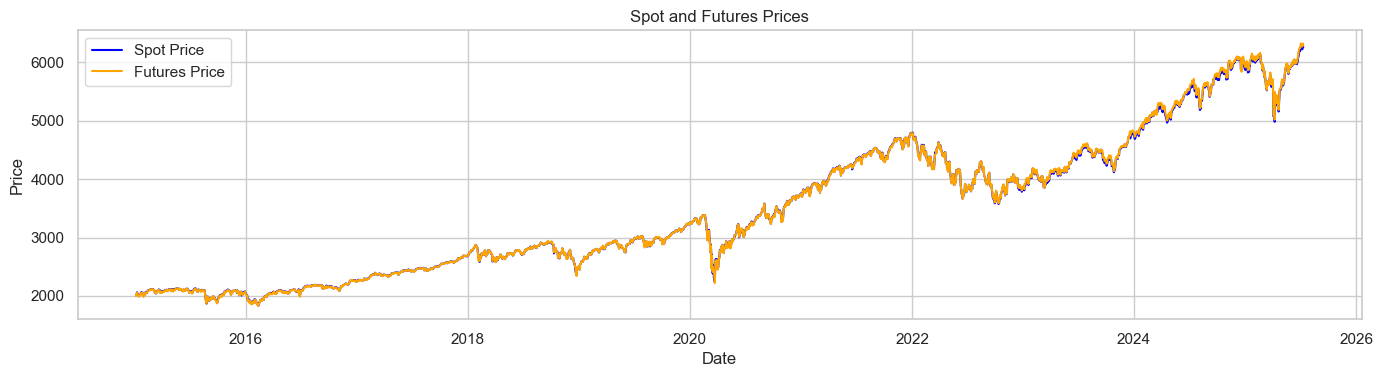

In [14]:
# Adjusted snippet for plotting with a DatetimeIndex
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)

# Plot against the DataFrame's index instead of the former 'date' column
plt.plot(merged_data.index, merged_data['price_spot'], label='Spot Price', color='blue')
plt.plot(merged_data.index, merged_data['price_futures'], label='Futures Price', color='orange')

plt.title('Spot and Futures Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Split Data into In-Sample and Out-of-Sample Periods

split_ratio = 0.8
split_index = int(len(merged_data) * split_ratio)

in_sample_data = merged_data.iloc[:split_index].copy()
out_of_sample_data = merged_data.iloc[split_index:].copy()

print(f"In-sample period: {in_sample_data.index.min().date()} to {in_sample_data.index.max().date()}")
print(f"Out-of-sample period: {out_of_sample_data.index.min().date()} to {out_of_sample_data.index.max().date()}")

In-sample period: 2015-01-05 to 2023-05-31
Out-of-sample period: 2023-06-01 to 2025-07-11


In [16]:
# ADF test on raw prices for stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value for {title}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

adf_test(merged_data['price_spot'], title='Spot Price')
adf_test(merged_data['price_futures'], title='Futures Price')

ADF Statistic for Spot Price: 0.40123349860196944
p-value for Spot Price: 0.9815410113947086
Critical Values:
  1%: -3.432834129730111
  5%: -2.862637500037151
  10%: -2.56735423758412
ADF Statistic for Futures Price: 0.45751015413264867
p-value for Futures Price: 0.9835228024007537
Critical Values:
  1%: -3.432834129730111
  5%: -2.862637500037151
  10%: -2.56735423758412


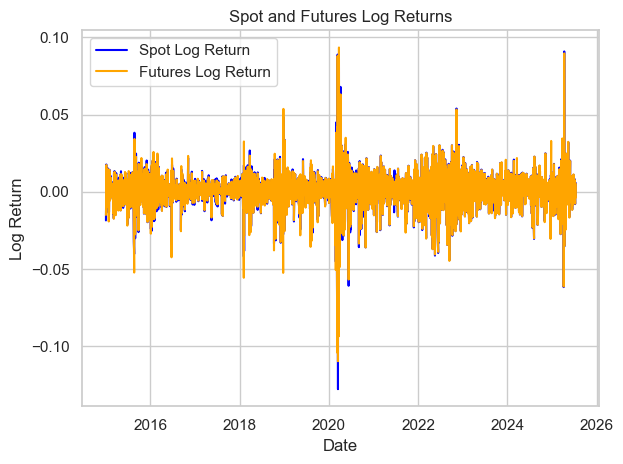

In [17]:
# Plotting the log returns against the DatetimeIndex
# Plot against the DataFrame's index instead of the 'date' column
plt.plot(merged_data.index, merged_data['log_return_spot'], label='Spot Log Return', color='blue')
plt.plot(merged_data.index, merged_data['log_return_futures'], label='Futures Log Return', color='orange')

plt.title('Spot and Futures Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# ADF test on log returns for stationarity
adf_test(merged_data['log_return_spot'], title='Spot Log Return')
adf_test(merged_data['log_return_futures'], title='Futures Log Return')

ADF Statistic for Spot Log Return: -16.486500748939132
p-value for Spot Log Return: 2.21245226327174e-29
Critical Values:
  1%: -3.4328331864239274
  5%: -2.8626370834536976
  10%: -2.56735401579277
ADF Statistic for Futures Log Return: -13.939831234487622
p-value for Futures Log Return: 4.914776764722663e-26
Critical Values:
  1%: -3.4328388570317134
  5%: -2.862639587708993
  10%: -2.5673553490725616


In [19]:
def summarize_dataframe(df):
    summary = {}
    numeric_cols = df.select_dtypes(include='number').columns
    
    for col in numeric_cols:
        data = df[col]
        summary[col] = {
            'Mean': data.mean(),
            'Standard Deviation': data.std(),
            'Skewness': data.skew(),
            'Kurtosis': data.kurtosis(),
            'Min': data.min(),
            'Max': data.max(),
            '25% Quantile': data.quantile(0.25),
            '50% Quantile (Median)': data.quantile(0.5),
            '75% Quantile': data.quantile(0.75),
            'Count (N)': data.count()
        }
        
    return pd.DataFrame(summary).T

In [20]:
# Summary table of log returns
summary_log_returns = summarize_dataframe(merged_data[['log_return_spot', 'log_return_futures']])
print("Summary of Log Returns:\n", summary_log_returns)

Summary of Log Returns:
                         Mean  Standard Deviation  Skewness   Kurtosis  \
log_return_spot     0.000421            0.011471 -0.647997  15.676347   
log_return_futures  0.000425            0.011491 -0.714553  14.639748   

                         Min       Max  25% Quantile  50% Quantile (Median)  \
log_return_spot    -0.127652  0.090895     -0.003819               0.000687   
log_return_futures -0.109552  0.093446     -0.003893               0.000582   

                    75% Quantile  Count (N)  
log_return_spot         0.005794     2645.0  
log_return_futures      0.005599     2645.0  


In [21]:
# Rescale log returns for GARCH model
def rescale_log_returns(df, scale_factor=100):
    df['log_return_spot'] *= scale_factor
    df['log_return_futures'] *= scale_factor
    return df
in_sample_data = rescale_log_returns(in_sample_data)
out_of_sample_data = rescale_log_returns(out_of_sample_data)

In [22]:
# Run GARCH model on spot log returns
from arch import arch_model
model = arch_model(in_sample_data['log_return_spot'], vol='Garch', p=1, q=1)
garch_fit_spot = model.fit(disp='off')
print(garch_fit_spot.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:        log_return_spot   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2767.94
Distribution:                  Normal   AIC:                           5543.88
Method:            Maximum Likelihood   BIC:                           5566.50
                                        No. Observations:                 2116
Date:                Fri, Jul 25 2025   Df Residuals:                     2115
Time:                        14:05:55   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0780  1.637e-02      4.763  1.908e-06 [4.589e-0

In [23]:
# Run GARCH model on futures log returns
model_futures = arch_model(in_sample_data['log_return_futures'], vol='Garch', p=1, q=1)
garch_fit_futures = model_futures.fit(disp='off')
print(garch_fit_futures.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:     log_return_futures   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2774.92
Distribution:                  Normal   AIC:                           5557.84
Method:            Maximum Likelihood   BIC:                           5580.47
                                        No. Observations:                 2116
Date:                Fri, Jul 25 2025   Df Residuals:                     2115
Time:                        14:05:55   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0859  1.677e-02      5.121  3.034e-07 [5.302e-0

In [24]:
# Standardized residuals diagnostics for both models
std_residuals_spot = garch_fit_spot.std_resid
std_residuals_futures = garch_fit_futures.std_resid

from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.__future__ import reindexing
import statsmodels.api as sm
from scipy.stats import chi2

def engle_ng_tests(std_resid):
    resid_sq = std_resid ** 2
    sign_indicator = (std_resid < 0).astype(int)
    pos_indicator = (std_resid >= 0).astype(int)

    # Sign bias test
    X1 = sm.add_constant(sign_indicator)
    model_sign = sm.OLS(resid_sq, X1).fit()

    # Negative size bias test
    X2 = sm.add_constant(sign_indicator * std_resid)
    model_neg = sm.OLS(resid_sq, X2).fit()

    # Positive size bias test
    X3 = sm.add_constant(pos_indicator * std_resid)
    model_pos = sm.OLS(resid_sq, X3).fit()

    # Joint test: test if all 3 coefficients (except constant) = 0
    X_all = np.column_stack([sign_indicator,
                             sign_indicator * std_resid,
                             pos_indicator * std_resid])
    X_all = sm.add_constant(X_all)
    model_joint = sm.OLS(resid_sq, X_all).fit()

    # Calculate LM (Lagrange multiplier) test statistic for joint hypothesis (using RSS difference)
    # Alternatively, use the F-test p-value directly:
    joint_f_stat = model_joint.fvalue
    joint_pval = model_joint.f_pvalue

    return {
    'Sign Bias (p)': model_sign.pvalues.iloc[1],
    'Negative Size Bias (p)': model_neg.pvalues.iloc[1],
    'Positive Size Bias (p)': model_pos.pvalues.iloc[1],
    'Joint Test (F-stat, p)': (joint_f_stat, joint_pval)
}


def standardized_residual_diagnostics(garch_fit_spot, garch_fit_futures):

    diagnostics = {}
    for name, fit in {'Spot': garch_fit_spot, 'Futures': garch_fit_futures}.items():
        std_resid = fit.std_resid.dropna()

        skew_val = skew(std_resid)
        kurt_val = kurtosis(std_resid, fisher=False)
        jb_stat, jb_pval = jarque_bera(std_resid)

        lb_test = acorr_ljungbox(std_resid**2, lags=[10], return_df=True)
        lb_stat, lb_pval = lb_test.iloc[0]['lb_stat'], lb_test.iloc[0]['lb_pvalue']

        engle_ng = engle_ng_tests(std_resid)

        diagnostics[name] = {
            'Skewness': skew_val,
            'Kurtosis': kurt_val,
            'Jarque-Bera': {'Statistic': jb_stat, 'p-value': jb_pval},
            'Ljung-Box (Q^2, lag=10)': {'Statistic': lb_stat, 'p-value': lb_pval},
            'Engle-Ng Tests': engle_ng
        }

    return diagnostics

In [25]:
diagnostics = standardized_residual_diagnostics(garch_fit_spot, garch_fit_futures)
import pprint
pprint.pprint(diagnostics)


{'Futures': {'Engle-Ng Tests': {'Joint Test (F-stat, p)': (2775.486099811996,
                                                           0.0),
                                'Negative Size Bias (p)': 0.0,
                                'Positive Size Bias (p)': 2.0823721674910716e-13,
                                'Sign Bias (p)': 1.2207553103296032e-05},
             'Jarque-Bera': {'Statistic': 1209.265311565472,
                             'p-value': 2.5785408442511457e-263},
             'Kurtosis': 6.270284816761286,
             'Ljung-Box (Q^2, lag=10)': {'Statistic': 7.426419693423283,
                                         'p-value': 0.6846676468558355},
             'Skewness': -0.8690385245472733},
 'Spot': {'Engle-Ng Tests': {'Joint Test (F-stat, p)': (3010.719356331547, 0.0),
                             'Negative Size Bias (p)': 0.0,
                             'Positive Size Bias (p)': 4.0620121285196106e-19,
                             'Sign Bias (p)': 2.267936

| Metric                           | Spot          | Futures       |
| -------------------------------- | ------------- | ------------- |
| **Skewness**                     | -0.71         | -0.79         |
| **Kurtosis**                     | 5.42          | 6.08          |
| **Jarque-Bera Statistic**        | 865.71        | 1319.31       |
| **Jarque-Bera p-value**          | 1.03 × 10⁻¹⁸⁸ | 3.28 × 10⁻²⁸⁷ |
| **Ljung-Box Statistic (lag=10)** | 12.21         | 8.39          |
| **Ljung-Box p-value**            | 0.27          | 0.59          |

| Engle-Ng Test                | Spot p-value   | Futures p-value |
| ---------------------------- | -------------- | --------------- |
| Sign Bias                    | 1.02 × 10⁻⁶    | 3.13 × 10⁻⁶     |
| Negative Size Bias           | 0.0            | 0.0             |
| Positive Size Bias           | 1.01 × 10⁻²⁵   | 1.63 × 10⁻²²    |
| Joint Test (F-stat, p-value) | (3748.38, 0.0) | (3504.21, 0.0)  |

In [26]:
# GJR-GARCH(1,1,1) with Skewed Student's t-distribution
# First for the spot log returns
scaled_log_return_spot = in_sample_data['log_return_spot'] 
model_spot_gjr_skewt = arch_model(scaled_log_return_spot, vol='Garch', p=1, o=1, q=1, dist='skewt')
garch_fit_spot_gjr_skewt = model_spot_gjr_skewt.fit(disp='off')
print("\n--- GJR-GARCH(1,1,1) Results for Spot Log Returns (Skewed Student's t) ---")
print(garch_fit_spot_gjr_skewt.summary())


--- GJR-GARCH(1,1,1) Results for Spot Log Returns (Skewed Student's t) ---
                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                   log_return_spot   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -2652.12
Distribution:      Standardized Skew Student's t   AIC:                           5318.25
Method:                       Maximum Likelihood   BIC:                           5357.85
                                                   No. Observations:                 2116
Date:                           Fri, Jul 25 2025   Df Residuals:                     2115
Time:                                   14:05:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err     

In [27]:
# Now for the futures log returns
scaled_log_return_futures = in_sample_data['log_return_futures']
model_futures_gjr_skewt = arch_model(scaled_log_return_futures, vol='Garch', p=1, o=1, q=1, dist='skewt')
garch_fit_futures_gjr_skewt = model_futures_gjr_skewt.fit(disp='off')
print("\n--- GJR-GARCH(1,1,1) Results for Futures Log Returns (Skewed Student's t) ---")
print(garch_fit_futures_gjr_skewt.summary())


--- GJR-GARCH(1,1,1) Results for Futures Log Returns (Skewed Student's t) ---
                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                log_return_futures   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -2638.10
Distribution:      Standardized Skew Student's t   AIC:                           5290.19
Method:                       Maximum Likelihood   BIC:                           5329.80
                                                   No. Observations:                 2116
Date:                           Fri, Jul 25 2025   Df Residuals:                     2115
Time:                                   14:05:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err  

In [28]:
# Run the diagnostics on the GJR-GARCH models
diagnostics_gjr = standardized_residual_diagnostics(garch_fit_spot_gjr_skewt, garch_fit_futures_gjr_skewt)
pprint.pprint(diagnostics_gjr)

{'Futures': {'Engle-Ng Tests': {'Joint Test (F-stat, p)': (2321.950548643315,
                                                           0.0),
                                'Negative Size Bias (p)': 0.0,
                                'Positive Size Bias (p)': 3.693448926507173e-13,
                                'Sign Bias (p)': 0.00010341600858663708},
             'Jarque-Bera': {'Statistic': 2304.029422437565, 'p-value': 0.0},
             'Kurtosis': 7.673047420178705,
             'Ljung-Box (Q^2, lag=10)': {'Statistic': 7.170675245173603,
                                         'p-value': 0.7092399100675562},
             'Skewness': -1.0362536687975714},
 'Spot': {'Engle-Ng Tests': {'Joint Test (F-stat, p)': (2262.3213159504426,
                                                        0.0),
                             'Negative Size Bias (p)': 0.0,
                             'Positive Size Bias (p)': 2.6734532180180863e-15,
                             'Sign Bias (p)': 0

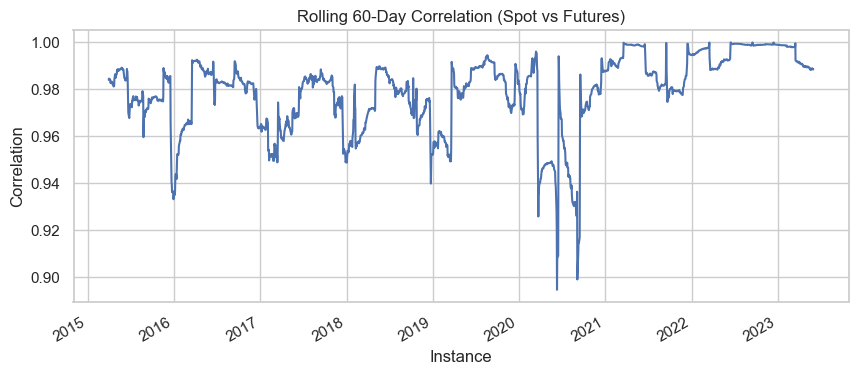

In [29]:
# Show rolling correlation
rolling_corr = in_sample_data['log_return_spot'].rolling(window=60).corr(merged_data['log_return_futures'])
rolling_corr.plot(title='Rolling 60-Day Correlation (Spot vs Futures)', figsize=(10, 4))
plt.xlabel('Instance')
plt.ylabel('Correlation')
plt.show()

Sample correlation: 0.9804
Engle's CCC Test statistic Q = 2033.7175
p-value = 0.0000


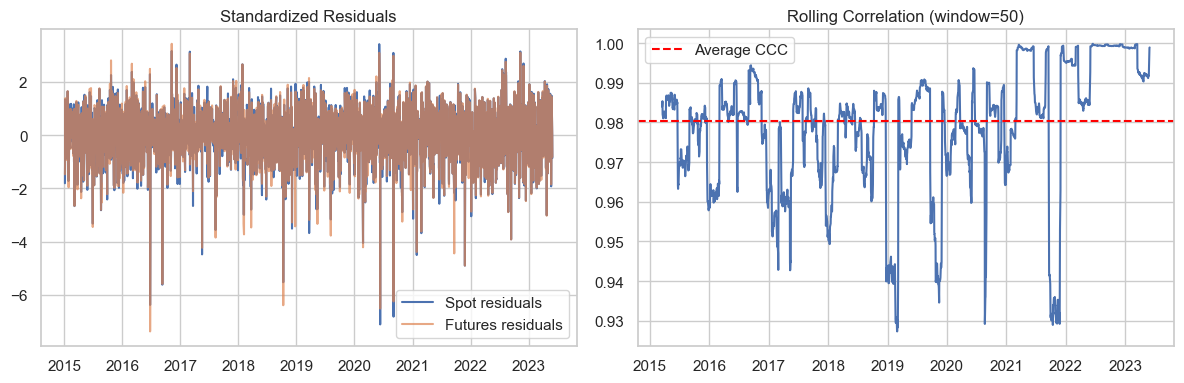

In [30]:
# Standardized residuals from GJR-GARCH models
std_residuals_spot_gjr = garch_fit_spot_gjr_skewt.std_resid
std_residuals_futures_gjr = garch_fit_futures_gjr_skewt.std_resid

from scipy.stats import chi2

# Standardized residuals (already aligned and clean)
z_spot = std_residuals_spot_gjr
z_fut = std_residuals_futures_gjr

# Compute sample correlation
rho_hat = np.corrcoef(z_spot, z_fut)[0, 1]

# Engle's CCC test statistic
T = len(z_spot)
Q = T * rho_hat**2
p_value = 1 - chi2.cdf(Q, df=1)

print(f"Sample correlation: {rho_hat:.4f}")
print(f"Engle's CCC Test statistic Q = {Q:.4f}")
print(f"p-value = {p_value:.4f}")

# Plot standardized residuals and rolling correlation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(z_spot, label='Spot residuals')
plt.plot(z_fut, label='Futures residuals', alpha=0.7)
plt.title('Standardized Residuals')
plt.legend()

plt.subplot(1, 2, 2)
rolling_corr = z_spot.rolling(window=50).corr(z_fut)
plt.plot(rolling_corr)
plt.title('Rolling Correlation (window=50)')
plt.axhline(rho_hat, color='red', linestyle='--', label='Average CCC')
plt.legend()

plt.tight_layout()
plt.show()



In [31]:
import rpy2.robjects.packages as rpackages
import rpy2.robjects.vectors as rvectors

# Import R's 'utils' package
utils = rpackages.importr('utils')

# Select a CRAN mirror (1 = first mirror)
utils.chooseCRANmirror(ind=1)

# Check if 'tseries' is installed; if not, install it
packnames = ('tseries', 'rugarch', 'rmgarch')
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]

if len(names_to_install) > 0:
    utils.install_packages(rvectors.StrVector(names_to_install))


Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
c:\Users\chris\anaconda3\Lib\site-packages\rpy2\rinterface\__init__.py:1211: UserWarning: Environment variable "PATH" redefined by R and overriding existing variable. Current: "c:\Users\chris\anaconda3;C:\Users\chris\anaconda3;C:\Users\chris\anaconda3\Library\mingw-w64\bin;C:\Users\chris\anaconda3\Library\usr\bin;C:\Users\chris\anaconda3\Library\bin;C:\Users\chris\anaconda3\Scripts;C:\Users\chris\anaconda3\bin;C:\Users\chris\anaconda3\condabin;C:\Program Files\Eclipse Adoptium\jdk-11.0.24.8-hotspot\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\dotnet;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\NVIDIA Corporation\NVIDIA

In [32]:
returns = in_sample_data[['log_return_spot', 'log_return_futures']].copy()
print(returns.head())

            log_return_spot  log_return_futures
date                                           
2015-01-05        -1.844722           -1.489350
2015-01-06        -0.893327           -1.072196
2015-01-07         1.156272            1.245656
2015-01-08         1.773023            1.742589
2015-01-09        -0.843940           -0.965719


In [33]:
# Convert data frame to R data frame
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro

# Use updated conversion method
with localconverter(pandas2ri.converter):
    r_returns = ro.conversion.py2rpy(returns)

# Assign to R environment
ro.globalenv['returns'] = r_returns

In [34]:
# Fit the DCC-GARCH & DCC-GJR-GARCH in R
ro.r('Sys.setlocale("LC_ALL", "C")')

ro.r('''
library(rugarch)
library(rmgarch)

# DCC-GARCH specification
spec_garch <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE),
  distribution.model = "norm"
)

# DCC-GJR-GARCH specification
spec_gjr <- ugarchspec(
  variance.model = list(model = "gjrGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(0, 0), include.mean = TRUE),
  distribution.model = "norm"
)

# Wrap into DCC specs
dcc_spec_garch <- dccspec(
  uspec = multispec(replicate(ncol(returns), spec_garch)),
  dccOrder = c(1, 1),
  distribution = "mvnorm"
)

dcc_spec_gjr <- dccspec(
  uspec = multispec(replicate(ncol(returns), spec_gjr)),
  dccOrder = c(1, 1),
  distribution = "mvnorm"
)

# Fit the models
dcc_fit_garch <- dccfit(dcc_spec_garch, data = returns)
dcc_fit_gjr   <- dccfit(dcc_spec_gjr, data = returns)
''')


R callback write-console: Lade nötiges Paket: parallel
  


In [35]:
# Fit the DCC-GARCH & DCC-GJR-GARCH in R with new specifications
ro.r('''
library(rugarch)
library(rmgarch)

# DCC-GARCH specification with AR(1) and sstd
spec_garch <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(1, 0), include.mean = TRUE),
  distribution.model = "sstd"
)

# DCC-GJR-GARCH specification with AR(1) and sstd
spec_gjr <- ugarchspec(
  variance.model = list(model = "gjrGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(1, 0), include.mean = TRUE),
  distribution.model = "sstd"
)

# Wrap into DCC specs using the multivariate t-distribution
dcc_spec_garch <- dccspec(
  uspec = multispec(replicate(ncol(returns), spec_garch)),
  dccOrder = c(1, 1),
  distribution = "mvt"
)

dcc_spec_gjr <- dccspec(
  uspec = multispec(replicate(ncol(returns), spec_gjr)),
  dccOrder = c(1, 1),
  distribution = "mvt"
)

# Fit the models
dcc_fit_garch_ar1_sstd <- dccfit(dcc_spec_garch, data = returns)
dcc_fit_gjr_ar1_sstd   <- dccfit(dcc_spec_gjr, data = returns)
''')

print("Models successfully fitted with AR(1) mean and sstd.")

Models successfully fitted with AR(1) mean and sstd.


In [36]:
# Create a Python function to print model summaries

# Import R functions into Python for easy access
coef_func = ro.r['coef']
infocrit_func = ro.r['infocriteria']
likelihood_func = ro.r['likelihood']

def print_model_summary(model_object, model_name):
    """
    Extracts and prints a formatted summary for a fitted R DCC model object.
    """
    print(f"\n--- Summary for: {model_name} ---")
    
    # Get coefficients
    coefs = coef_func(model_object)
    print("\nCoefficients:")
    for name, val in zip(coefs.names, list(coefs)):
        print(f"{name}: {val:.6f}")
    
    # Get information criteria
    info_crit = infocrit_func(model_object)
    print("\nInformation Criteria:")
    print(f"AIC: {info_crit[0]:.6f}")
    print(f"BIC: {info_crit[1]:.6f}")
    print(f"SIC: {info_crit[2]:.6f}")
    
    # Get log-likelihood
    llh = likelihood_func(model_object)
    print(f"\nLog-Likelihood: {llh[0]:.6f}")
    print("-" * 50)

#  Get model objects and print summaries for all four

# Get the fitted model objects from R's global environment
dcc_fit_garch = ro.globalenv['dcc_fit_garch']
dcc_fit_gjr = ro.globalenv['dcc_fit_gjr']
dcc_fit_garch_refitted = ro.globalenv['dcc_fit_garch_ar1_sstd']
dcc_fit_gjr_refitted = ro.globalenv['dcc_fit_gjr_ar1_sstd']

# Create a dictionary of models to summarize
models_to_summarize = {
    "Initial DCC-GARCH (Normal Dist.)": dcc_fit_garch,
    "Initial DCC-GJR-GARCH (Normal Dist.)": dcc_fit_gjr,
    "Refitted DCC-GARCH (AR1, sstd)": dcc_fit_garch_refitted,
    "Refitted DCC-GJR-GARCH (AR1, sstd)": dcc_fit_gjr_refitted
}

# Loop through and print the summary for each model
for name, model in models_to_summarize.items():
    print_model_summary(model, name)


--- Summary for: Initial DCC-GARCH (Normal Dist.) ---

Coefficients:
[log_return_spot].mu: 0.078058
[log_return_spot].omega: 0.038735
[log_return_spot].alpha1: 0.204474
[log_return_spot].beta1: 0.772724
[log_return_futures].mu: 0.085931
[log_return_futures].omega: 0.038930
[log_return_futures].alpha1: 0.226004
[log_return_futures].beta1: 0.760473
[Joint]dcca1: 0.194134
[Joint]dccb1: 0.476372

Information Criteria:
AIC: 1.784117
BIC: 1.813526
SIC: 1.784063

Log-Likelihood: -1876.595899
--------------------------------------------------

--- Summary for: Initial DCC-GJR-GARCH (Normal Dist.) ---

Coefficients:
[log_return_spot].mu: 0.043839
[log_return_spot].omega: 0.038336
[log_return_spot].alpha1: 0.084175
[log_return_spot].beta1: 0.778128
[log_return_spot].gamma1: 0.229387
[log_return_futures].mu: 0.049437
[log_return_futures].omega: 0.038240
[log_return_futures].alpha1: 0.090265
[log_return_futures].beta1: 0.766997
[log_return_futures].gamma1: 0.255339
[Joint]dcca1: 0.228219
[Joint]d

In [37]:
ro.r('''
library(MTS)

# This function takes a fitted model, standardizes its residuals,
# and performs the multivariate Ljung-Box test.
run_mq_test <- function(fit_object) {
  # Extract raw residuals and conditional covariance matrices
  raw_resid <- residuals(fit_object)
  cov_mat <- rcov(fit_object)
  
  # Get dimensions
  n <- dim(raw_resid)[1]
  k <- dim(raw_resid)[2]

  # Initialize matrix for standardized residuals
  std_resid <- matrix(NA, n, k)

  # Standardize residuals manually
  for (t in 1:n) {
    std_resid[t, ] <- raw_resid[t, ] / sqrt(diag(cov_mat[, , t]))
  }
  
  # Perform and print the Li-McLeod (multivariate Ljung-Box) test
  # The mq() function will automatically print its results table
  mq(std_resid, lag = 10)
}
''')

# Run Diagnostics for Each of the two Models

# Create a list of the R variable names for models
model_names = [ 
    'dcc_fit_garch_ar1_sstd', 
    'dcc_fit_gjr_ar1_sstd'
]

print("--- Multivariate Ljung-Box (Li-McLeod) Test Results ---")

# Loop through the model names and execute the diagnostic function for each
for name in model_names:
    print(f"\n\n--- Diagnostics for: {name} ---")
    try:
        # Call the R function with the current model name
        ro.r(f"run_mq_test({name})")
    except Exception as e:
        print(f"Could not run diagnostics for {name}. Error: {e}")


--- Multivariate Ljung-Box (Li-McLeod) Test Results ---


--- Diagnostics for: dcc_fit_garch_ar1_sstd ---
Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1       303       4        0
 [2,]     2       307       8        0
 [3,]     3       313      12        0
 [4,]     4       318      16        0
 [5,]     5       321      20        0
 [6,]     6       330      24        0
 [7,]     7       337      28        0
 [8,]     8       339      32        0
 [9,]     9       343      36        0
[10,]    10       346      40        0


--- Diagnostics for: dcc_fit_gjr_ar1_sstd ---
Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1       313       4        0
 [2,]     2       315       8        0
 [3,]     3       322      12        0
 [4,]     4       328      16        0
 [5,]     5       331      20        0
 [6,]     6       339      24        0
 [7,]     7       345      28        0
 [8,]     8       347      32        0
 [9,]     9       

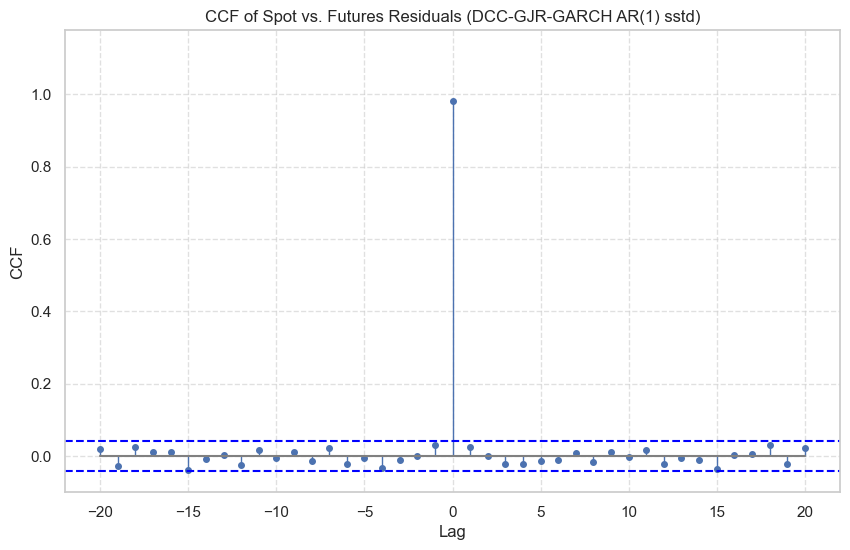

In [38]:
# This code gets the CCF values from R without plotting
r_code_calculate_ccf = """
# 1. Manually Calculate Standardized Residuals
raw_resid_ar1 <- residuals(dcc_fit_gjr_ar1)
cond_sigma_ar1 <- sigma(dcc_fit_gjr_ar1)
std_resid_ar1 <- raw_resid_ar1 / cond_sigma_ar1

# 2. Calculate the CCF values but DO NOT plot them
ccf_data <- ccf(as.numeric(std_resid_ar1[,1]), 
                as.numeric(std_resid_ar1[,2]), 
                lag.max=20, 
                plot=FALSE)
"""

# Execute the R code
ro.r(r_code_calculate_ccf)

# Now, plot the results using Python's Matplotlib

# Get the CCF data object from R's environment
ccf_data_py = ro.globalenv['ccf_data']

# Extract the lags and correlation values and FLATTEN them to 1D
lags = np.array(ccf_data_py.rx2('lag')).flatten()
correlations = np.array(ccf_data_py.rx2('acf')).flatten()
n_obs = len(returns)

# Calculate the 95% confidence intervals
conf_interval = 1.96 / np.sqrt(n_obs)

# Create the plot
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(lags, correlations, basefmt='grey')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 4)

# Add confidence interval lines
plt.axhline(conf_interval, color='blue', linestyle='--')
plt.axhline(-conf_interval, color='blue', linestyle='--')

# Add labels and title
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('CCF of Spot vs. Futures Residuals (DCC-GJR-GARCH AR(1) sstd)')
plt.ylim(min(correlations.min() * 1.2, -0.1), max(correlations.max() * 1.2, 0.1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

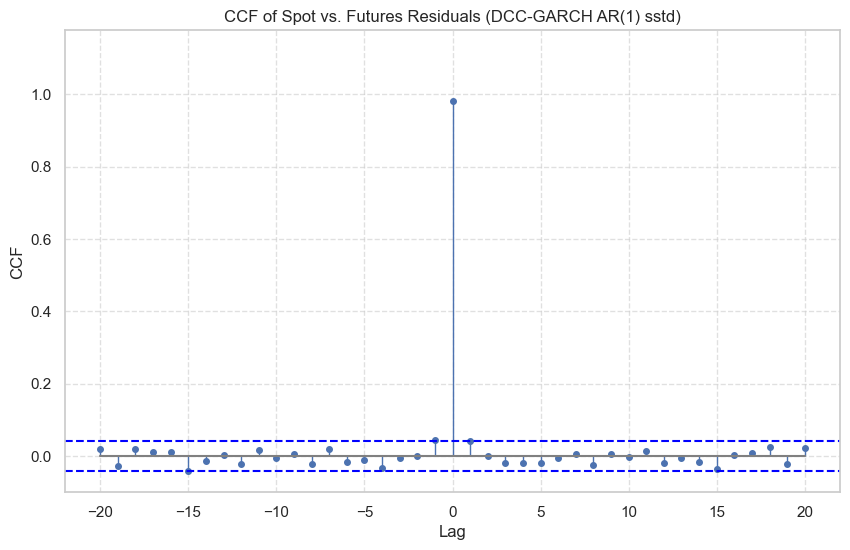

In [39]:
r_code_calculate_ccf = """
# 1. Manually Calculate Standardized Residuals for dcc_fit_garch_ar1_sstd
raw_resid_garch <- residuals(dcc_fit_garch_ar1_sstd)
cond_sigma_garch <- sigma(dcc_fit_garch_ar1_sstd)
std_resid_garch <- raw_resid_garch / cond_sigma_garch

# 2. Calculate the CCF values but DO NOT plot them
ccf_data <- ccf(as.numeric(std_resid_garch[,1]), 
                as.numeric(std_resid_garch[,2]), 
                lag.max=20, 
                plot=FALSE)
"""

# Execute the R code
ro.r(r_code_calculate_ccf)

# Extract CCF data from R environment
ccf_data_py = ro.globalenv['ccf_data']

lags = np.array(ccf_data_py.rx2('lag')).flatten()
correlations = np.array(ccf_data_py.rx2('acf')).flatten()
n_obs = len(returns)

conf_interval = 1.96 / np.sqrt(n_obs)

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(lags, correlations, basefmt='grey')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 4)

plt.axhline(conf_interval, color='blue', linestyle='--')
plt.axhline(-conf_interval, color='blue', linestyle='--')

plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('CCF of Spot vs. Futures Residuals (DCC-GARCH AR(1) sstd)')
plt.ylim(min(correlations.min() * 1.2, -0.1), max(correlations.max() * 1.2, 0.1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [40]:
from rpy2.robjects.packages import importr

# Setup: Import R packages
stats = importr('stats')
rgarch = importr('rugarch')

print("Retrieving fitted models from the R environment...")
# Retrieve the two 'Normal' distribution models
dcc_fit_garch = ro.globalenv['dcc_fit_garch']
dcc_fit_gjr = ro.globalenv['dcc_fit_gjr']

# Retrieve the two 'AR(1) + sstd' models
dcc_fit_garch_ar1_sstd = ro.globalenv['dcc_fit_garch_ar1_sstd']
dcc_fit_gjr_ar1_sstd = ro.globalenv['dcc_fit_gjr_ar1_sstd']
print("All four models retrieved successfully.")

# Metrics for standard DCC-GARCH

coef_func = ro.r['coef']
infocrit_func = ro.r['infocriteria']
likelihood_func = ro.r['likelihood']

garch_metrics = {
    'AIC': infocrit_func(dcc_fit_garch)[0],
    'BIC': infocrit_func(dcc_fit_garch)[1],
    'Log-Likelihood': likelihood_func(dcc_fit_garch)[0],
}

# Metrics for standard DCC-GJR-GARCH 
gjr_metrics = {
    'AIC': infocrit_func(dcc_fit_gjr)[0],
    'BIC': infocrit_func(dcc_fit_gjr)[1],
    'Log-Likelihood': likelihood_func(dcc_fit_gjr)[0],
}

# Metrics for DCC-GARCH (AR1 + sstd)
garch_ar1_sstd_metrics = {
    'AIC': infocrit_func(dcc_fit_garch_ar1_sstd)[0],
    'BIC': infocrit_func(dcc_fit_garch_ar1_sstd)[1],
    'Log-Likelihood': likelihood_func(dcc_fit_garch_ar1_sstd)[0],
}

# Metrics for DCC-GJR-GARCH (AR1 + sstd)
gjr_ar1_sstd_metrics = {
    'AIC': infocrit_func(dcc_fit_gjr_ar1_sstd)[0],
    'BIC': infocrit_func(dcc_fit_gjr_ar1_sstd)[1],
    'Log-Likelihood': likelihood_func(dcc_fit_gjr_ar1_sstd)[0],
}


# Create DataFrame for comparison of all four models
comparison_df = pd.DataFrame({
    'DCC-GARCH': garch_metrics,
    'DCC-GJR-GARCH': gjr_metrics,
    'DCC-GARCH (AR1+sstd)': garch_ar1_sstd_metrics,
    'DCC-GJR-GARCH (AR1+sstd)': gjr_ar1_sstd_metrics
})

# Display the final comparison table, transposed for readability
print("\nFull Model Comparison Table:\n")
print(comparison_df.round(4).T)

Retrieving fitted models from the R environment...
All four models retrieved successfully.

Full Model Comparison Table:

                             AIC     BIC  Log-Likelihood
DCC-GARCH                 1.7841  1.8135      -1876.5959
DCC-GJR-GARCH             1.6931  1.7278      -1778.2573
DCC-GARCH (AR1+sstd)      1.0177  1.0659      -1058.7737
DCC-GJR-GARCH (AR1+sstd)  1.0320  1.0855      -1071.8693
